In [1]:
#Final Code Blocks Used for Analysis

In [3]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

food15 = pd.read_csv('2015_food.csv', index_col = 'country')
food00 = pd.read_csv('2000_food.csv', index_col = 'country')

display(food00.T)
display(food15.T)



country,USA,United Kingdom,Mexico,Republic of Korea,Japan
fruits,79.759293,102.749810,146.435820,140.136250,131.495190
non_starchy_vegetables,108.648150,114.259680,125.927250,138.167680,236.351490
beans_legumes,18.298235,33.053192,76.326988,47.721695,65.855598
nuts_seeds,3.848480,4.490870,2.629381,0.604978,2.152231
unprocessed_red_meat,39.208031,35.295815,44.277470,53.279396,48.950119
sugar_sweetened_beverages,314.990630,185.082690,454.585450,39.545010,121.352780
fruit_juice,101.935080,40.701363,25.345570,23.138237,28.714445
total_protein,77.804665,65.807755,56.088802,73.400284,68.138329
calcium,852.095830,890.527470,905.781800,518.364500,567.087520
potassium,2807.394500,3426.773700,2143.038800,2875.786100,2524.472400


country,USA,United Kingdom,Mexico,Republic of Korea,Japan
fruits,74.989456,110.177790,132.407680,120.863040,124.908390
non_starchy_vegetables,102.065100,104.875250,110.762030,118.617090,214.050860
beans_legumes,14.151632,32.734184,59.504757,32.733288,55.922306
nuts_seeds,4.038484,4.666541,2.548061,0.660632,2.292519
unprocessed_red_meat,36.214947,30.696743,35.003193,35.569302,39.758896
sugar_sweetened_beverages,326.669070,200.982450,482.592220,38.734955,115.009020
fruit_juice,90.404755,35.271713,20.145832,15.109911,23.331530
total_protein,78.203712,64.570572,56.570564,70.429436,65.676979
calcium,871.866700,907.238890,929.086360,516.719540,572.864070
potassium,2688.124300,3442.639900,2145.292700,2952.917700,2344.177000


In [6]:
#upload the data with genders and age
gen15 = pd.read_csv('genderage2015.csv', index_col='country')
#just male
male = gen15['gender']==0
#just female
fem = gen15['gender']==1
#younger (0-19)
yng = gen15['age']==0
#older (20+)
old = gen15['age']==1
#just the total_milk from 2000 and 2015
dairy00 = food00['total_milk']
dairy15 = food15['total_milk']
#just the sugar sweetened beverages from 2000 and 2015
ssb00 = food00['sugar_sweetened_beverages']
ssb15 = food15['sugar_sweetened_beverages']
#remove japan because we are no longer looking there
ssb15 = ssb15.drop('Japan')
ssb00 = ssb00.drop('Japan')
dairy00 = dairy00.drop('Japan')
dairy15 = dairy15.drop('Japan')


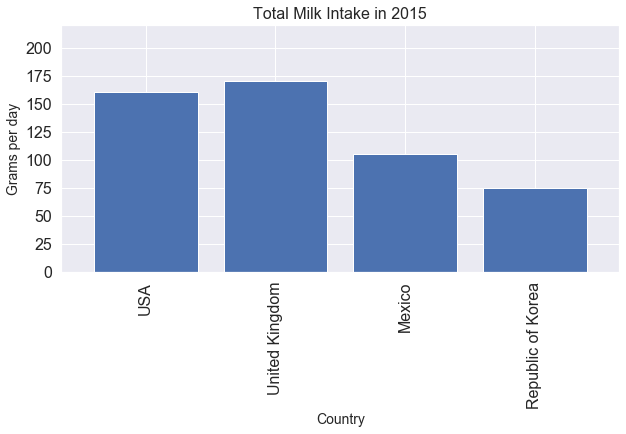

In [90]:
#plotting milk consumption for 2000 and 2015 by year

plt.subplot(2, 1, 2)
dairy15.T.plot(kind = 'bar', figsize = (10,10), width = 0.8, fontsize = 16)
plt.title('Total Milk Intake in 2015', fontsize=16)
plt.ylim(0, 220)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Grams per day', fontsize=14)
plt.show()

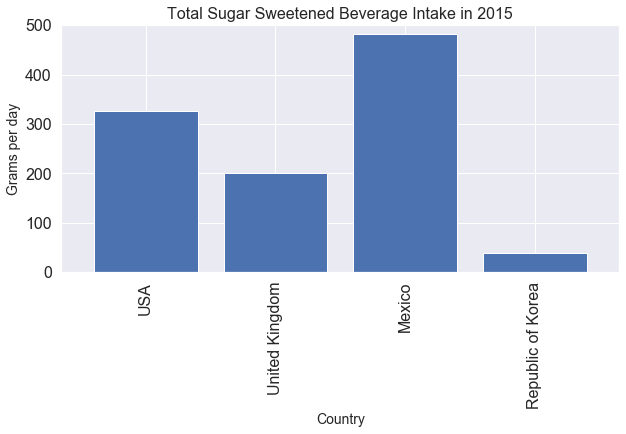

In [89]:
#plotting SSB Consumption by Year

plt.subplot(2, 1, 2)
ssb15.T.plot(kind = 'bar', figsize = (10,10), width = 0.8, fontsize = 16)
plt.title('Total Sugar Sweetened Beverage Intake in 2015', fontsize=16)
plt.ylim(0, 500)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Grams per day', fontsize=14)
plt.show()

In [21]:
#Is there a correlation between consumption of ssb and dairy and obesity?

#get all gender obesity data
dftp = pd.read_csv('dfTotalPopulation.csv', index_col = 'Country')
dftp = dftp[dftp['Year'] == 2016]
display(dftp.T)
dftp = dftp.drop('Japan')
dftp = dftp.drop('Chile')
dftp = dftp.drop('Latvia')
dftp = dftp.drop('New Zealand')
display(dftp)


Country,Mexico,Korea,Chile,Latvia,Japan,United States,New Zealand,United Kingdom
Measure,% of total population,% of total population,% of total population,% of total population,% of total population,% of total population,% of total population,% of total population
Year,2016,2016,2016,2016,2016,2016,2016,2016
Value,33.3,5.5,34.4,23.2,4.2,40,31.6,26.2


,Measure,Year,Value
Country,,,
Mexico,% of total population,2016,33.3
Korea,% of total population,2016,5.5
United States,% of total population,2016,40.0
United Kingdom,% of total population,2016,26.2


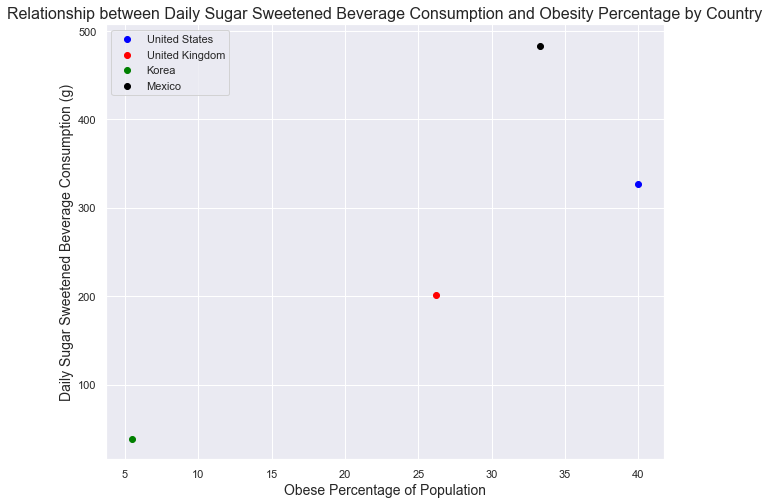

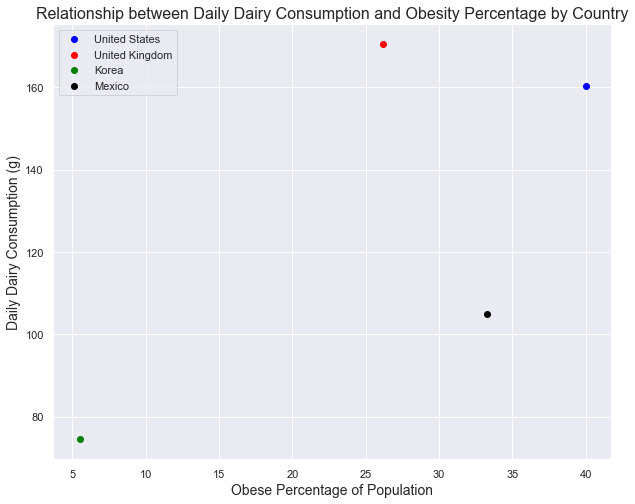

In [87]:
#make obesity variables
dftp = pd.read_csv('dfTotalPopulation.csv', index_col = 'Measure')
dftpUS = dftp[dftp['Country'] == 'United States']
dftpUS = dftpUS[dftpUS['Year'] == 2016]
dftpUK = dftp[dftp['Country'] == 'United Kingdom']
dftpuk = dftpUK[dftpUK['Year'] == 2016]
dftpk = dftp[dftp['Country'] == 'Korea']
dftpk = dftpk[dftpk['Year'] == 2016]
dftpm = dftp[dftp['Country'] == 'Mexico']
dftpm = dftpm[dftpm['Year'] == 2016]

#make the consumption variables
ssbUS = ssb15['USA']
ssbUK = ssb15['United Kingdom']
ssbK = ssb15['Republic of Korea']
ssbM = ssb15['Mexico']

dairyUS = dairy15['USA']
dairyUK = dairy15['United Kingdom']
dairyK = dairy15['Republic of Korea']
dairyM = dairy15['Mexico']

#plot figures to look at correlation and analyze

plt.figure(figsize = (10, 8))
plt.scatter(dftpUS.Value, ssbUS, label = 'United States', color = 'blue')
plt.scatter(dftpuk.Value, ssbUK, label = 'United Kingdom', color = 'red')
plt.scatter(dftpk.Value, ssbK, label = 'Korea', color = 'green')
plt.scatter(dftpm.Value, ssbM, label = 'Mexico', color = 'black')
plt.xlabel('Obese Percentage of Population', fontsize = 14)
plt.ylabel('Daily Sugar Sweetened Beverage Consumption (g)', fontsize = 14)
plt.title('Relationship between Daily Sugar Sweetened Beverage Consumption and Obesity Percentage by Country', fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize = (10, 8))
plt.scatter(dftpUS.Value, dairyUS, label = 'United States', color = 'blue')
plt.scatter(dftpuk.Value, dairyUK, label = 'United Kingdom', color = 'red')
plt.scatter(dftpk.Value, dairyK, label = 'Korea', color = 'green')
plt.scatter(dftpm.Value, dairyM, label = 'Mexico', color = 'black')
plt.xlabel('Obese Percentage of Population', fontsize = 14)
plt.ylabel('Daily Dairy Consumption (g)', fontsize = 14)
plt.title('Relationship between Daily Dairy Consumption and Obesity Percentage by Country', fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()